In [2]:
pip install wordcloud

In [4]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install colorlover

In [7]:
import numpy as np
import pylab as pl
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import wordcloud
from wordcloud import WordCloud,STOPWORDS
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.utils import shuffle
import matplotlib.ticker as mtick

# Plotly
import plotly.express as px
import plotly.graph_objects as go
import colorlover as cl
from plotly.subplots import make_subplots

In [9]:
data = pd.read_csv(r'C:\Users\HP\OneDrive\Desktop\data-final.csv', delimiter='\t')
data

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015336,4.0,2.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,...,2018-11-08 12:04:58,1920.0,1080.0,3.0,160.0,10,2,US,39.9883,-75.2208
1015337,4.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,3.0,...,2018-11-08 12:07:18,1920.0,1080.0,3.0,122.0,7,1,US,38.0,-97.0
1015338,4.0,2.0,4.0,3.0,5.0,1.0,4.0,2.0,4.0,4.0,...,2018-11-08 12:07:49,1920.0,1080.0,2.0,135.0,12,6,US,36.1473,-86.777
1015339,2.0,4.0,3.0,4.0,2.0,2.0,1.0,4.0,2.0,4.0,...,2018-11-08 12:08:34,1920.0,1080.0,6.0,212.0,8,1,US,34.1067,-117.8067


In [10]:
#Check Missing Value
print('Is there any missing value? ', data.isnull().values.any())
print('How many missing values? ', data.isnull().values.sum())
data.dropna(inplace=True)
print('Number of participants after eliminating missing values: ', len(data))

Is there any missing value?  True
How many missing values?  186358
Number of participants after eliminating missing values:  1012050


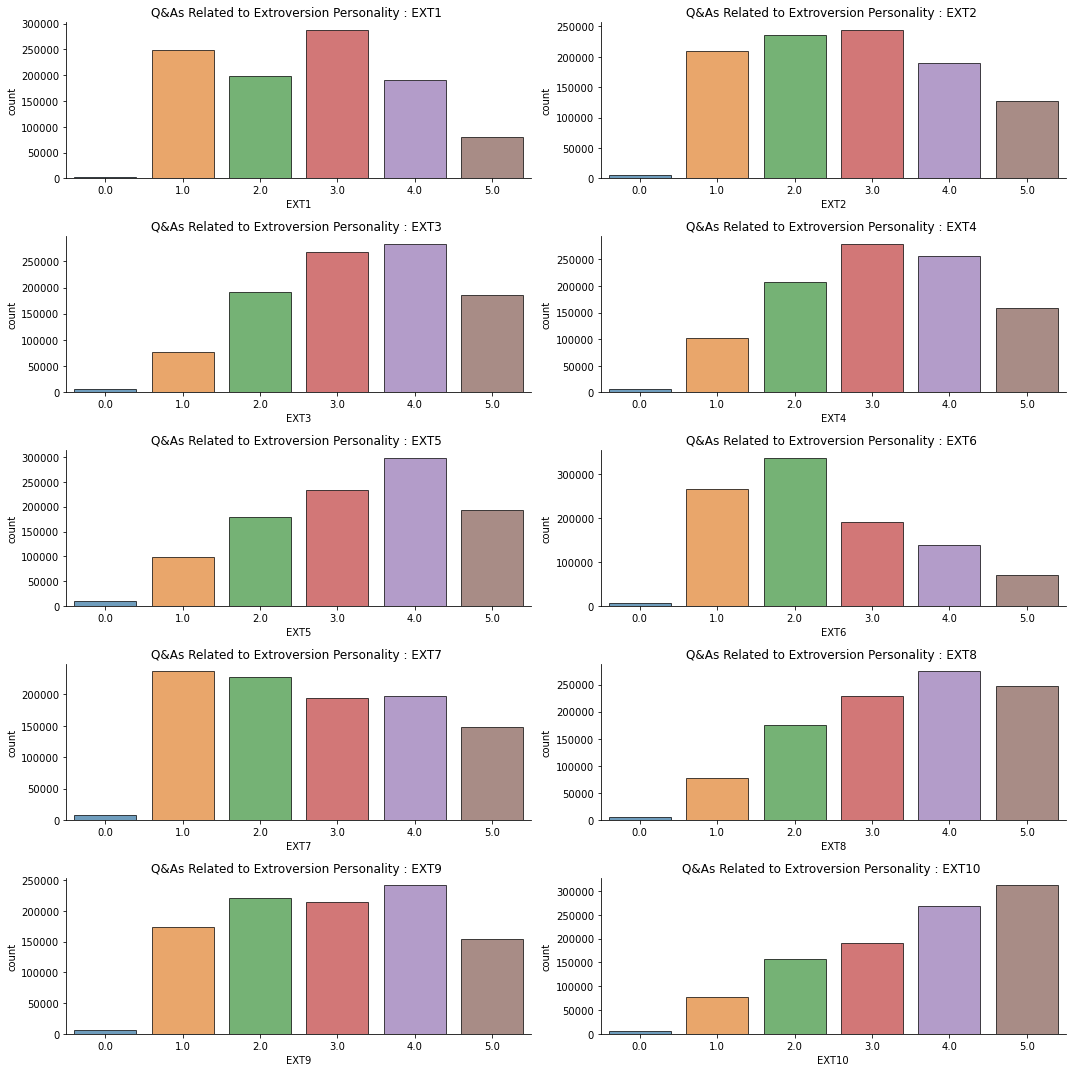

In [11]:
#barplots showing the frequency of each category
plt.figure(figsize=[15,15])
fft=['EXT1','EXT2','EXT3','EXT4','EXT5','EXT6','EXT7','EXT8','EXT9','EXT10']
n=1
for f in fft:
    plt.subplot(5,2,n)
    sns.countplot(x=f,  edgecolor="black", alpha=0.7, data=data)
    sns.despine()
    plt.title("Q&As Related to Extroversion Personality : {} ".format(f))
    n=n+1
plt.tight_layout()
plt.show()

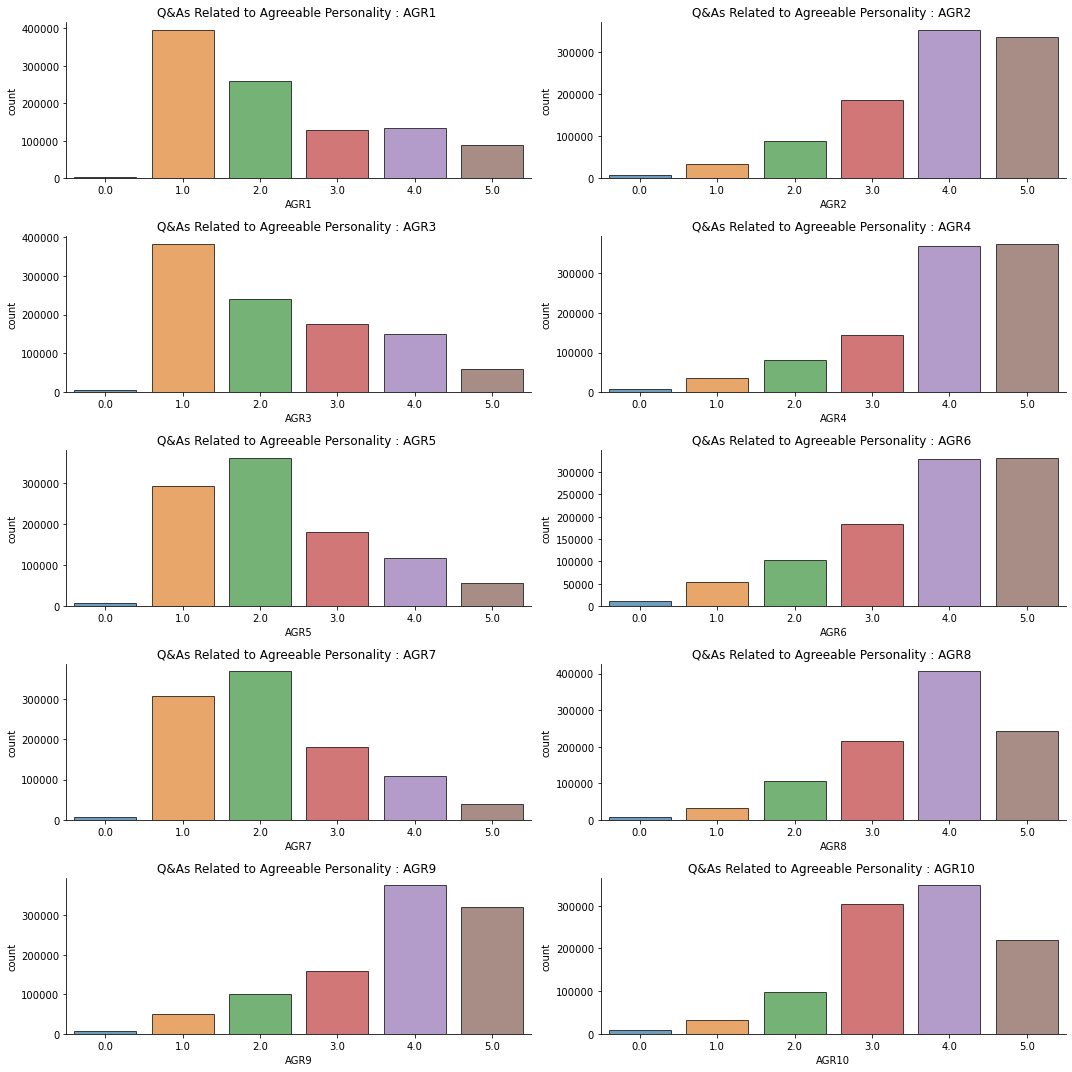

In [12]:
#barplots showing the frequency of each category 
plt.figure(figsize=[15,15])
fft=['AGR1','AGR2','AGR3','AGR4','AGR5','AGR6','AGR7','AGR8','AGR9','AGR10']
n=1
for f in fft:
    plt.subplot(5,2,n)
    sns.countplot(x=f, edgecolor="black", alpha=0.7, data=data)
    sns.despine()
    plt.title("Q&As Related to Agreeable Personality : {} ".format(f))
    n=n+1
plt.tight_layout()
plt.show()

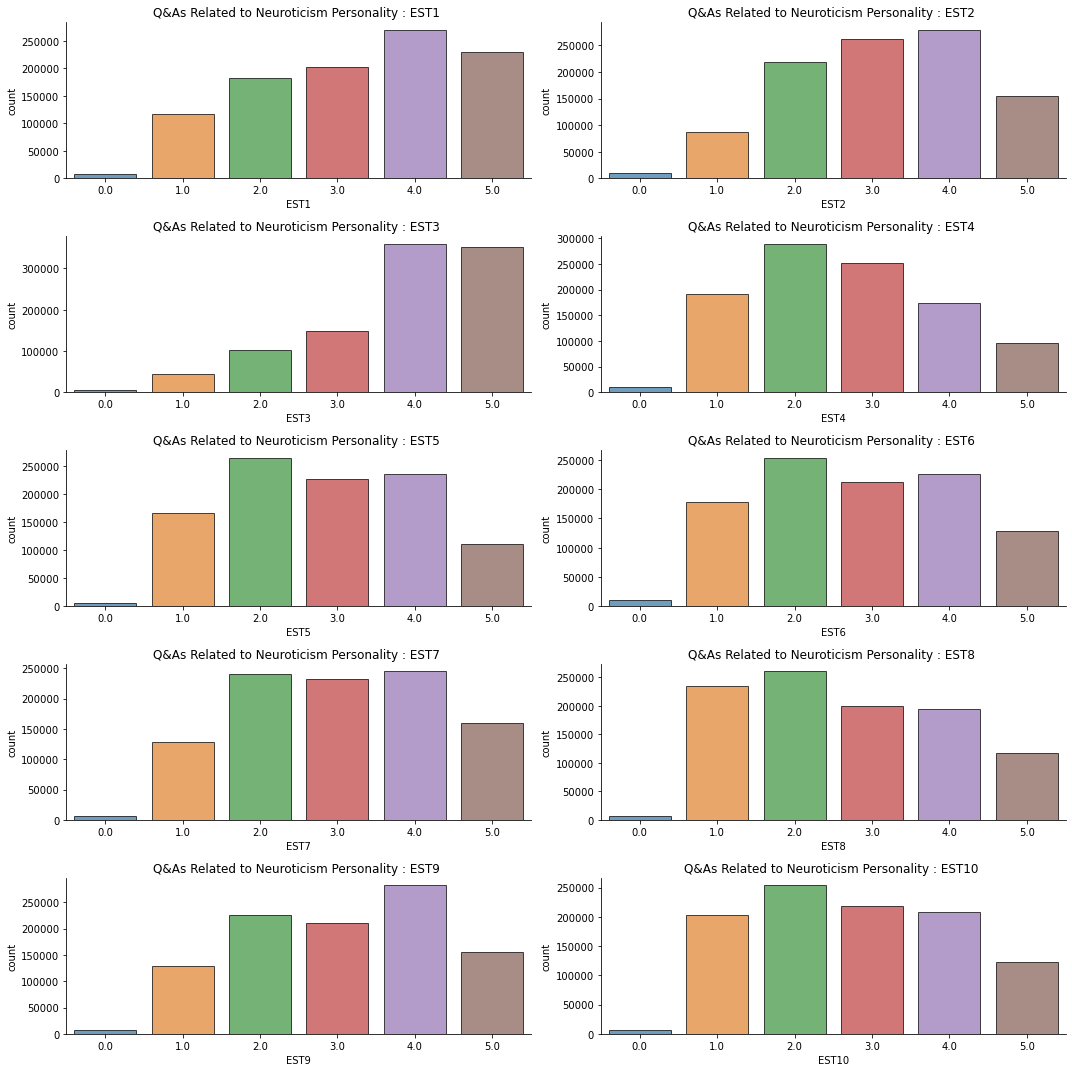

In [13]:
#barplots showing the frequency of each category 
plt.figure(figsize=[15,15])
fft=['EST1','EST2','EST3','EST4','EST5','EST6','EST7','EST8','EST9','EST10']
n=1
for f in fft:
    plt.subplot(5,2,n)
    sns.countplot(x=f,  edgecolor="black", alpha=0.7, data=data)
    sns.despine()
    plt.title("Q&As Related to Neuroticism Personality : {} ".format(f))
    n=n+1
plt.tight_layout()
plt.show()

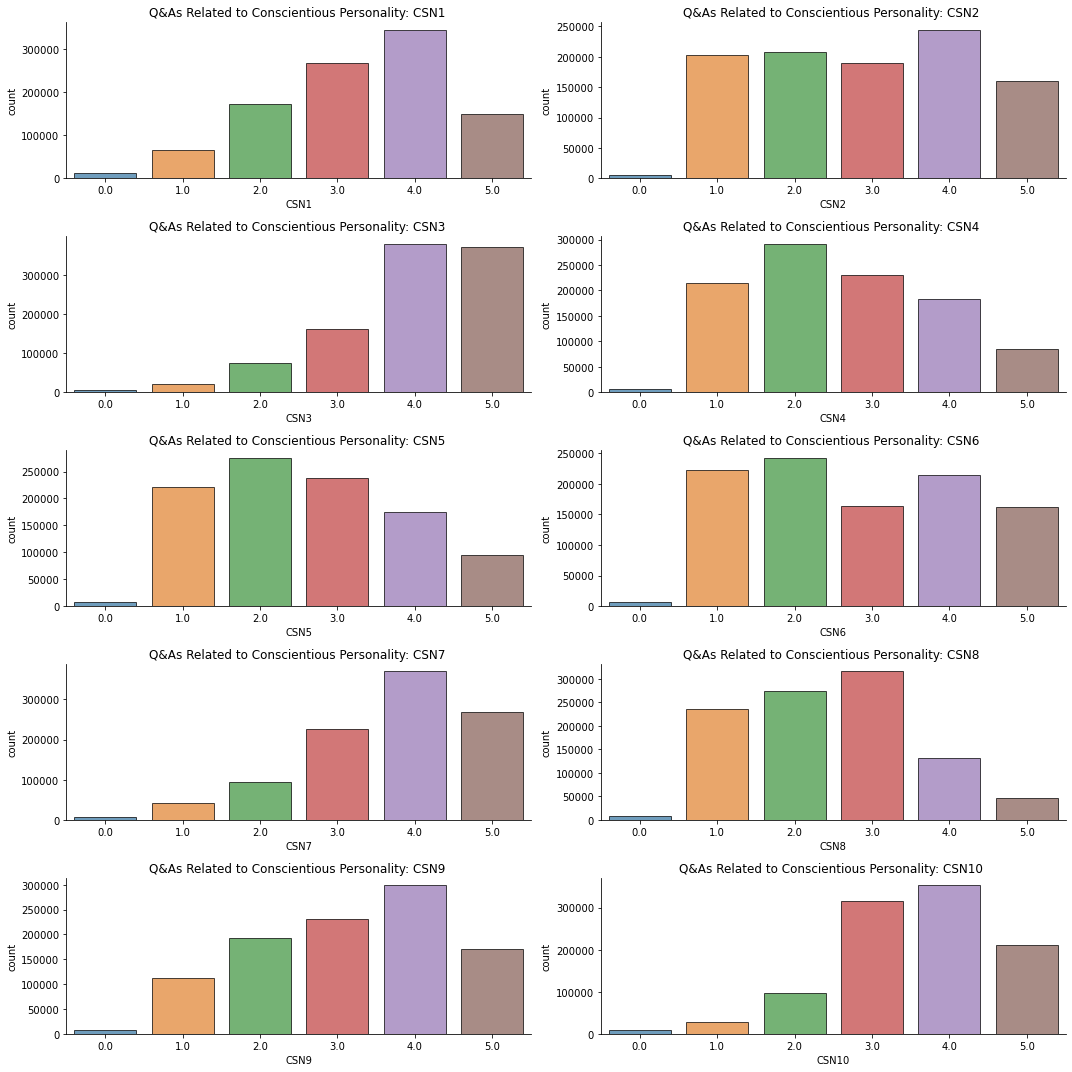

In [15]:
#barplots showing the frequency of each category 
plt.figure(figsize=[15,15])
fft=['CSN1','CSN2','CSN3','CSN4','CSN5','CSN6','CSN7','CSN8','CSN9','CSN10']
n=1
for f in fft:
    plt.subplot(5,2,n)
    sns.countplot(x=f, edgecolor="black", alpha=0.7, data=data)
    sns.despine()
    plt.title("Q&As Related to Conscientious Personality: {} ".format(f))
    n=n+1
plt.tight_layout()
plt.show()

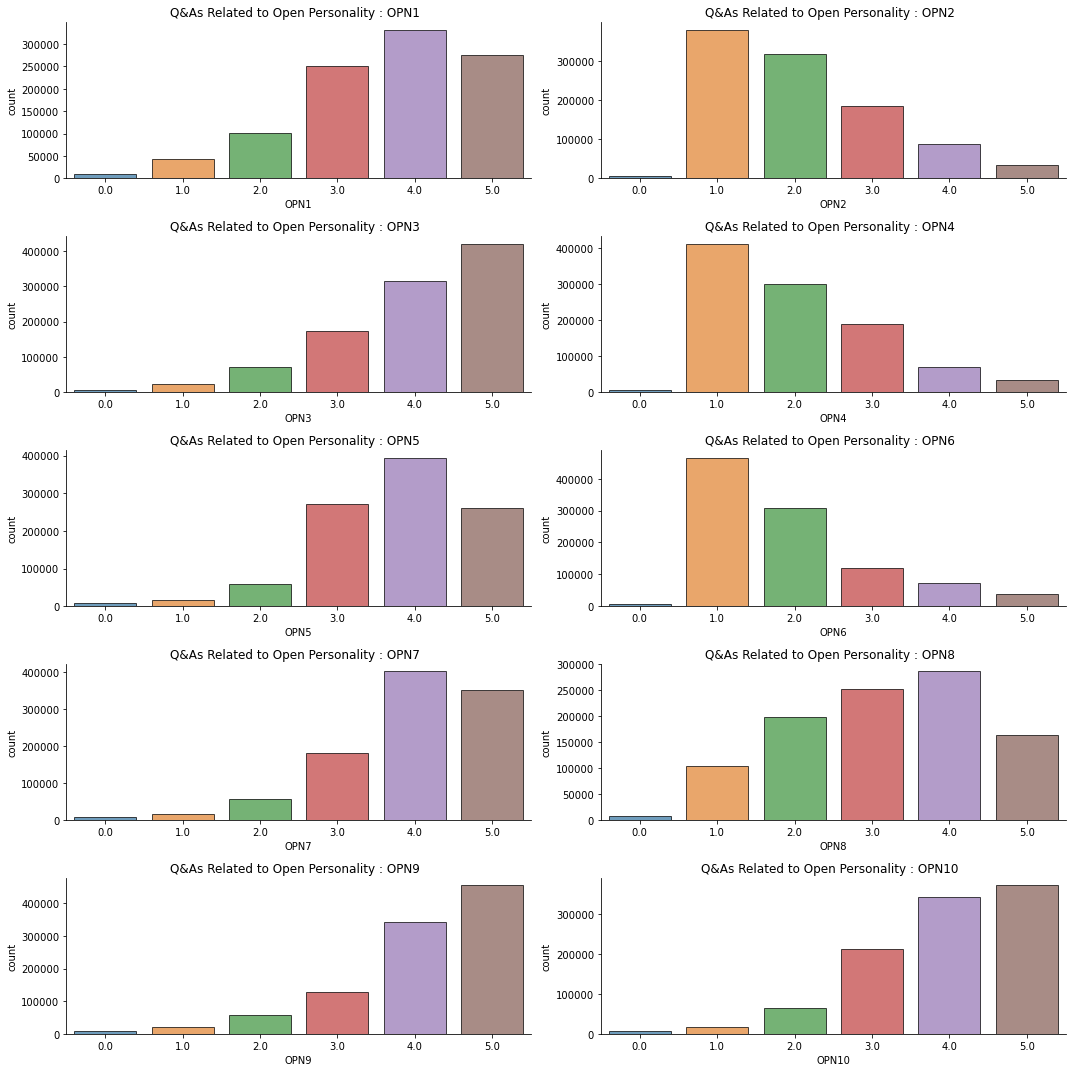

In [16]:
#barplots showing the frequency of each category 
plt.figure(figsize=[15,15])
fft=['OPN1','OPN2','OPN3','OPN4','OPN5','OPN6','OPN7','OPN8','OPN9','OPN10']
n=1
for f in fft:
    plt.subplot(5,2,n)
    sns.countplot(x=f,  edgecolor="black", alpha=0.7, data=data)
    sns.despine()
    plt.title("Q&As Related to Open Personality : {}  ".format(f))
    n=n+1
plt.tight_layout()
plt.show()

In [17]:
X=data.copy()
X.drop(X.columns[50:107], axis=1, inplace=True)
X.drop(X.columns[51:], axis=1, inplace=True)

In [18]:
# Creating K-means Cluster Model
from sklearn.cluster import KMeans

df_model = X.drop('country', axis=1)

#fit model
kmeans = KMeans(n_clusters=5)
k_fit = kmeans.fit(df_model)

In [19]:
# Predicting the Clusters
pd.options.display.max_columns = 10
predictions = k_fit.labels_
df_model['Clusters'] = predictions
df_model.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,...,OPN7,OPN8,OPN9,OPN10,Clusters
0,4.0,1.0,5.0,2.0,5.0,...,5.0,3.0,4.0,5.0,0
1,3.0,5.0,3.0,4.0,3.0,...,4.0,2.0,5.0,3.0,2
2,2.0,3.0,4.0,4.0,3.0,...,5.0,3.0,4.0,4.0,2
3,2.0,2.0,2.0,3.0,4.0,...,4.0,4.0,3.0,3.0,3
4,3.0,3.0,3.0,3.0,5.0,...,5.0,3.0,5.0,5.0,0


In [20]:
# Summing up the different questions groups
col_list = list(df_model)
ext = col_list[0:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

data_sums = pd.DataFrame()
data_sums['extroversion'] = df_model[ext].sum(axis=1)/10
data_sums['neurotic'] = df_model[est].sum(axis=1)/10
data_sums['agreeable'] = df_model[agr].sum(axis=1)/10
data_sums['conscientious'] = df_model[csn].sum(axis=1)/10
data_sums['open'] = df_model[opn].sum(axis=1)/10
data_sums['clusters'] = predictions
data_sums.groupby('clusters').mean()

,extroversion,neurotic,agreeable,conscientious,open
clusters,,,,,
0,3.085196,2.422934,3.208858,3.106702,3.327652
1,3.072227,3.427266,3.300115,3.211433,3.352397
2,3.052670,2.977324,3.187415,3.158086,3.242816
3,2.908672,2.528319,2.850705,2.914767,3.120836
4,2.966147,3.646093,3.149332,3.173698,3.245845


In [21]:
# In order to visualize in 2D graph I will use PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_fit = pca.fit_transform(df_model)

df_pca = pd.DataFrame(data=pca_fit, columns=['PCA1', 'PCA2'])
df_pca['Clusters'] = predictions
df_pca.head()

,PCA1,PCA2,Clusters
0,-5.833697,-1.108100,0
1,0.430378,2.988737,2
2,-0.426235,2.195466,2
3,1.465314,0.245559,3
4,-4.933177,2.716774,0


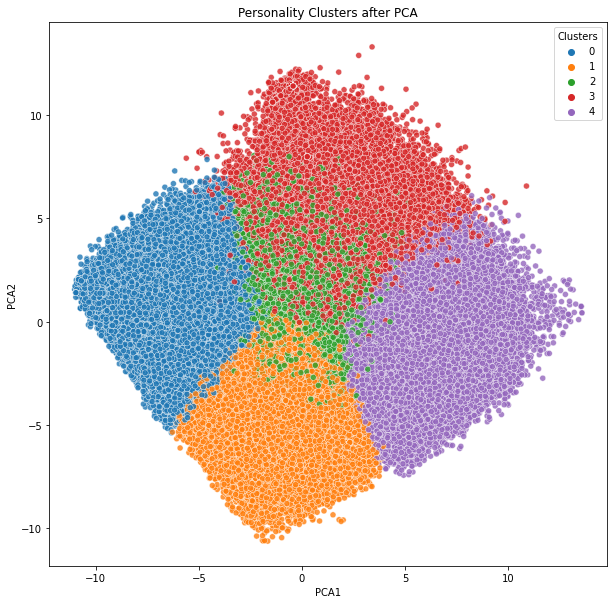

In [22]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Clusters', palette='tab10', alpha=0.8)
plt.title('Personality Clusters after PCA');

In [ ]:
from sklearn.manifold import TSNE

Xtsne = TSNE(n_components=2).fit_transform(df_pca)
dftsne = pd.DataFrame(data=Xtsne , columns = ['x1','x2'])
dftsne['cluster'] = predictions
dftsne.head()

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=dftsne,x='x1',y='x2',hue='cluster',legend="full", palette='tab10', alpha=0.8)
plt.title('Personality Clusters Visualized on TSNE 2D');